# Analysis of Inaugural Addresses
This notebook aims to analyze the inaugural addresses of all presidents to date and discover how they have changed over time.

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

Author: Aditya Ranjan

## 1. Data preparation
The first step is to prepare the data I will be working with.

#### A. Import essential libraries
Before starting, I have to import the libraries which I will be using throughout the notebook.



In [1]:
#Import essential libraries
!pip install textstat
import textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 102 kB 3.0 MB/s 
     |████████████████████████████████| 3.0 MB 6.0 MB/s 


#### B. Store the data in a data frame
I can now read the original csv file and store its contents in a pandas data frame.

In [2]:
#Getting the data
speeches = pd.read_csv("/kaggle/input/presidentialaddress/inaug_speeches.csv", encoding = "latin1")
speeches.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ..."


#### C. Creating lists to store the data
Now I can store the information from the data frame in lists which will all have different features of the speeches.

In [3]:
#Create lists to store information
years, numChars, numWords, numDifficult, daleScores = [], [], [], [], []

for i in range(len(speeches)):
  years.append(int(speeches["Date"][i][-4::]))
  numChars.append(len(speeches["text"][i]))
  numWords.append(len(speeches["text"][i].split(" ")))
  numDifficult.append(textstat.difficult_words(speeches["text"][i]))
  daleScores.append(textstat.dale_chall_readability_score(speeches["text"][i]))

## 2. Data visualization & analysis
The second step is to visualize and analyze the relationship between the variables.


#### A. Functions
Firstly, I have to create two functions - one that plots any given variable of the speeches against the years the speeches were given and another that generates a five-number summary for any given list.

In [4]:
#Function to plot a scatterplot of any variable against the year
def plot(yList, yLabel):
  plt.rcParams["figure.figsize"] = (14, 8)
  plt.xticks(range(len(years)), years, rotation = 90)
  plt.xlabel("Year that Inaugural Address was given")
  plt.ylabel(yLabel)

  x = [i for i in range(len(speeches))]
  plt.scatter(x, yList)

  coeff = np.polyfit([i for i in range(len(speeches))], yList, 1)
  regLine = [((coeff[0] * val) + coeff[1]) for val in x]
  plt.plot(x, regLine)

  plt.show()

  print("\nCorrelation Coefficient: " + str(np.corrcoef(x, yList, 1)[0][1]))


#Function that generates the five-number summary for any list
def fiveNum(inputList):
  quartiles = np.percentile(inputList, [0, 25, 50, 75, 100])
  print("Minimum: " + str(quartiles[0]))
  print("1st Quartile: " + str(quartiles[1]))
  print("Median: " + str(quartiles[2]))
  print("3rd Quartile: " + str(quartiles[3]))
  print("Maximum: " + str(quartiles[4]))

#### B. Number of characters
This visualization shows the relationship between the number of characters in a speech and the year it was given.

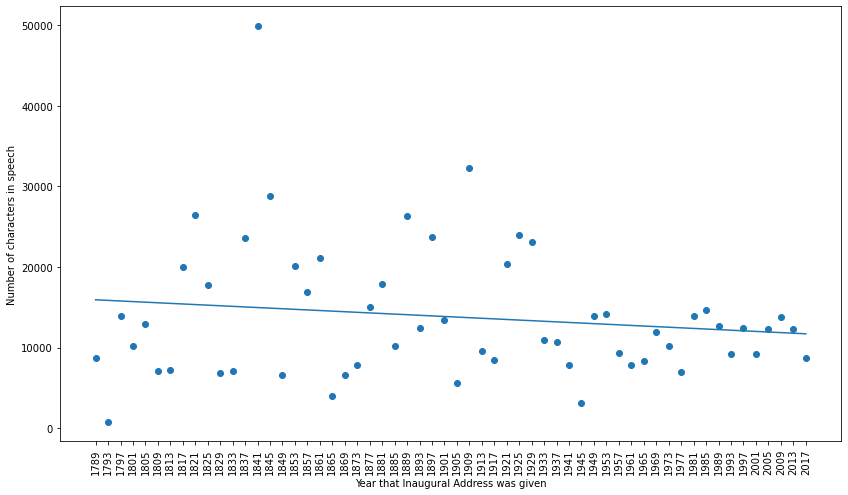


Correlation Coefficient: -0.15048899578045147


In [5]:
#Plot the number of characters against the year
plot(numChars, "Number of characters in speech")

As evidenced by the weak negative correlation, the number of characters in a president's inaugural address decreased on average between 1789 (George Washington's 1st term) and 2017 (Donald Trump's first term). This is most likely due to the expansion of democratic freedoms to everyone in the country, which meant that presidents had to appeal to a larger audience as time went on and keep their inaugural address succinct.

#### C. Number of space-separated words
This visualization shows the relationship between the number of space-separated words in a speech and the year it was given.

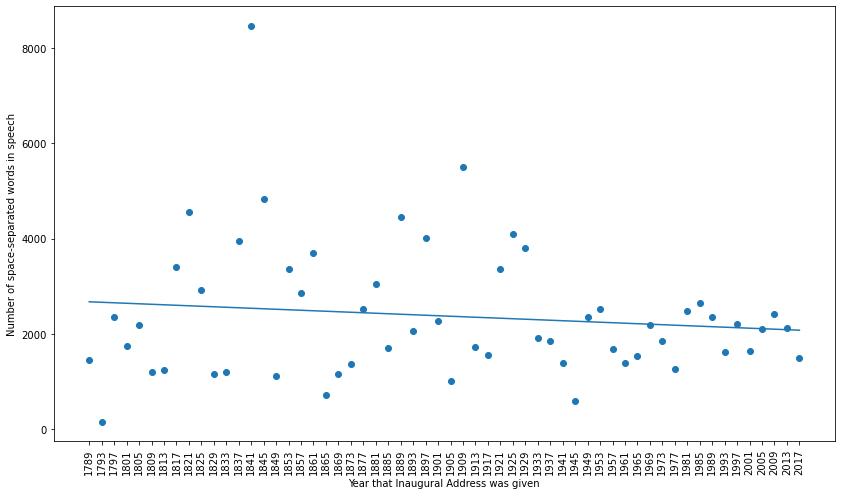


Correlation Coefficient: -0.12692329813365608


In [6]:
#Plot the number of space-separated words against the year
plot(numWords, "Number of space-separated words in speech")

As evidenced by the weak negative correlation, the number of space-separated words in a president's inaugural address also decreased on average. This is again due to the same reason that presidents had to keep their addresses shorter in order to appeal to a larger and more diverse audience.

#### D. Number of difficult words
This visualization shows the relationship between the number of difficult words in a speech and the year it was given.

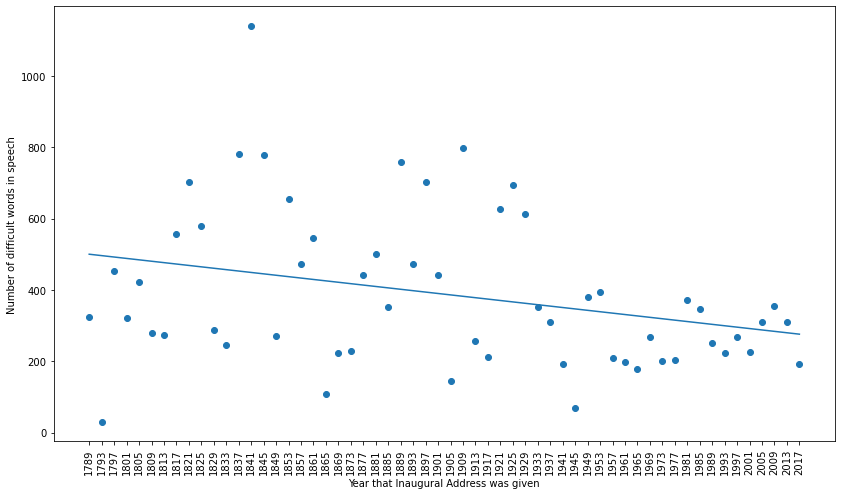


Correlation Coefficient: -0.3049757876444533


In [7]:
#Plot the number of difficult words against the year
plot(numDifficult, "Number of difficult words in speech")

As evidenced by the weak negative correlation, the number of difficult words in a president's inaugural address decreased on average. This is most likely due to the fact that the variety of citizens and groups of people involved in political processes became much more diverse as the nation made social progress such as the civil rights and women's rights movments. Along with the addresses being delivered to a wider span of audiences due to television and radio, this translated to presidents making their addresses more approachable and easier to understand as time went on.

#### E. Dale-Chall readability score
This visualization shows the relationship between the Dale-Chall readability score of a speech and the year it was given.

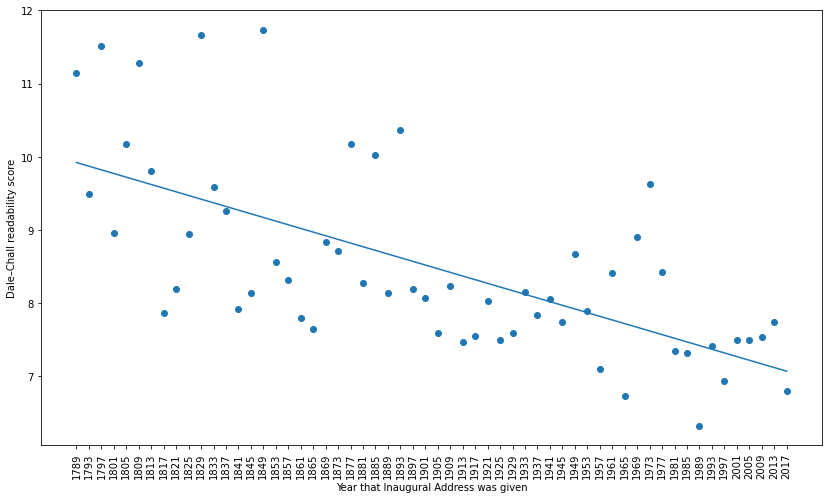


Correlation Coefficient: -0.6577255140843435


In [8]:
#Plot the Dale-Chall readability scores against the year
plot(daleScores, "Dale–Chall readability score")

As evidenced by the moderately strong negative correlation, the Dale-Chall readability score of a president's inaugural address decreased on average (college junior level to highschool freshman level). This is again due to the fact that as time went on, an inaugural address reached a much more diverse and larger group of people from all backgrounds, requiring the speech to be easier to understand for everyone.

#### F. Word cloud
This visualization shows the important words that are common throughout all inaugural addresses.

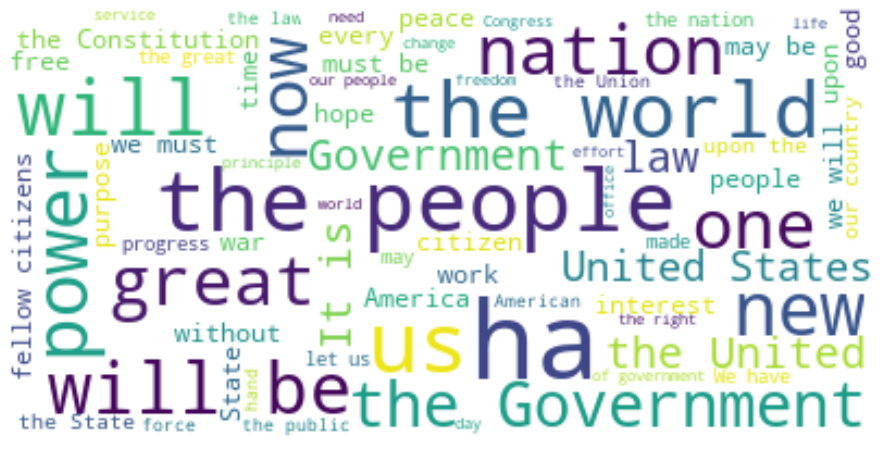

In [9]:
#Plot word cloud of all inaugural addresses
combinedText = ""
for i in range(len(speeches)):
  combinedText += " " + speeches["text"][i]

wordcloud = WordCloud(stopwords = set(STOPWORDS), max_font_size = 50, max_words = 70, background_color = "white").generate(combinedText)

plt.rcParams["figure.figsize"] = (16, 8)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As can be seen above, there are certain buzzwords which a lot of presidents use in their inaugural addresses. Most of these words, such as "will" and "power", serve a rhetorical purpose and create a patriotic atmosphere, which plays to the presidents' advantages and portray them as dutiful and sincere.

#### G. 10 longest inaugural addresses
This shows which presidents gave the ten longest inaugural addresses to date, how many words the addresses were, and what years they were given.

In [10]:
#Ten longest inaugural addresses
long = []
long.extend(numWords)
long.sort(reverse = True)

for i in range(10):
  index = numWords.index(long[i])
  print(str(i + 1) + ") " + list(speeches["Name"])[index] + ": " + str(long[i]) + " words" + " (" + str(years[index]) + ")")

1) William Henry Harrison: 8464 words (1841)
2) William Howard Taft: 5500 words (1909)
3) James Knox Polk: 4842 words (1845)
4) James Monroe: 4560 words (1821)
5) Benjamin Harrison: 4449 words (1889)
6) Calvin Coolidge: 4095 words (1925)
7) William McKinley: 4012 words (1897)
8) Martin Van Buren: 3944 words (1837)
9) Herbert Hoover: 3794 words (1929)
10) Abraham Lincoln: 3691 words (1861)


#### H. Ten shortest inaugural addresses
This shows which presidents gave the ten shortest inaugural addresses to date, how many words the addresses were, and what years they were given.

In [11]:
#Ten shortest inaugural addresses
short = []
short.extend(numWords)
short.sort()

for i in range(10):
  index = numWords.index(short[i])
  print(str(i + 1) + ") " + list(speeches["Name"])[index] + ": " + str(short[i]) + " words" + " (" + str(years[index]) + ")")

1) George Washington: 159 words (1793)
2) Franklin D. Roosevelt: 582 words (1945)
3) Abraham Lincoln: 724 words (1865)
4) Theodore Roosevelt: 1006 words (1905)
5) Zachary Taylor: 1111 words (1849)
6) Ulysses S. Grant: 1150 words (1869)
7) Andrew Jackson: 1151 words (1829)
8) Andrew Jackson: 1195 words (1833)
9) James Madison: 1196 words (1809)
10) James Madison: 1235 words (1813)


#### I. Five-number summary
This shows the five-number summaries of all the lists.

In [12]:
#Five-number summaries of all lists
print("Five-number summary of number of characters: ")
fiveNum(numChars)
print("")

print("Five-number summary of number of words: ")
fiveNum(numWords)
print("")

print("Five-number summary of number of difficult words: ")
fiveNum(numDifficult)
print("")

print("Five-number summary of Dale-Chall scores: ")
fiveNum(daleScores)

Five-number summary of number of characters: 
Minimum: 819.0
1st Quartile: 8370.5
Median: 12308.0
3rd Quartile: 17574.25
Maximum: 49885.0

Five-number summary of number of words: 
Minimum: 159.0
1st Quartile: 1461.25
Median: 2111.0
3rd Quartile: 2912.25
Maximum: 8464.0

Five-number summary of number of difficult words: 
Minimum: 31.0
1st Quartile: 227.0
Median: 322.5
3rd Quartile: 493.5
Maximum: 1140.0

Five-number summary of Dale-Chall scores: 
Minimum: 6.33
1st Quartile: 7.592499999999999
Median: 8.15
3rd Quartile: 8.955
Maximum: 11.73


## 3. Conclusion
With the analysis complete, I can now sum up my observations in a few sentences.

#### A. Inaugural addresses have become shorter.
As evidenced by the visualizations for both the number of characters and number of space-separated words, inaugural addresses have become significantly shorter as time has progressed. This is most likely due to the fact that the audience which presidents are appealing to have become more diverse in nature including people from all backgrounds, not just wealthy white males.

#### B. Inaugural addresses have become easier and less complicated.
As evidenced by the visualizations for both the number of difficult words and Dale-Chall scores, inaugural addresses have become significantly easier and more understandable as time has progressed. This is again due to the fact that presidents are appealing to a broader audience from different educational backgrounds. In addition to this, inaugural addresses are now broadcasted on tv, radio, youtube, etc. This means that along with adults, several kids and younger people are watching the speeches now, requiring the address to be approachable and understandable for everyone.

#### C. Overall themes haven't changed much.
As can be seen from the word cloud, presidents have been using the same buzzwords and rhetorical choices for the last 200 years or so. The strategy of developing a mood of patriotism and overcoming challenges is consistent throughout the years and is often used by politicans to distract the audience from other issues and portray themselves in a positive light.

#### D. What next?
There are a couple of things that could improve this analysis, which I plan to work on in the future. Firstly, data for political parties and information such as age and social background could potentially be very useful in analyzing how the characteristics of a president or political party affect the tone, difficulty, and length of an inaugural address. Secondly, some insight into historical events could also explain why some presidents gave much longer and difficult speeches whereas others gave much shorter and approachable ones.

#### E. Sources
https://www.kaggle.com/adhok93/presidentialaddress